In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("dataset/Global_Space_Launches.csv")

In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


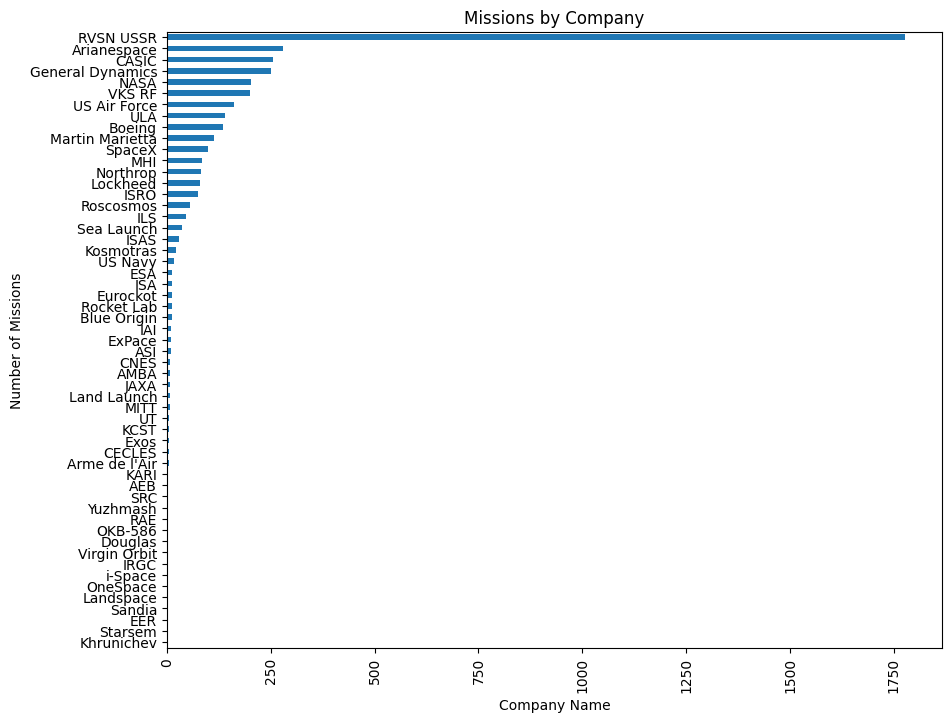

In [6]:
missions_by_company = df['Company Name'].value_counts(ascending=True)
plt.figure(figsize=(10, 8))
missions_by_company.plot(kind='barh')
plt.title('Missions by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Missions')
plt.xticks(rotation=90)
plt.show()

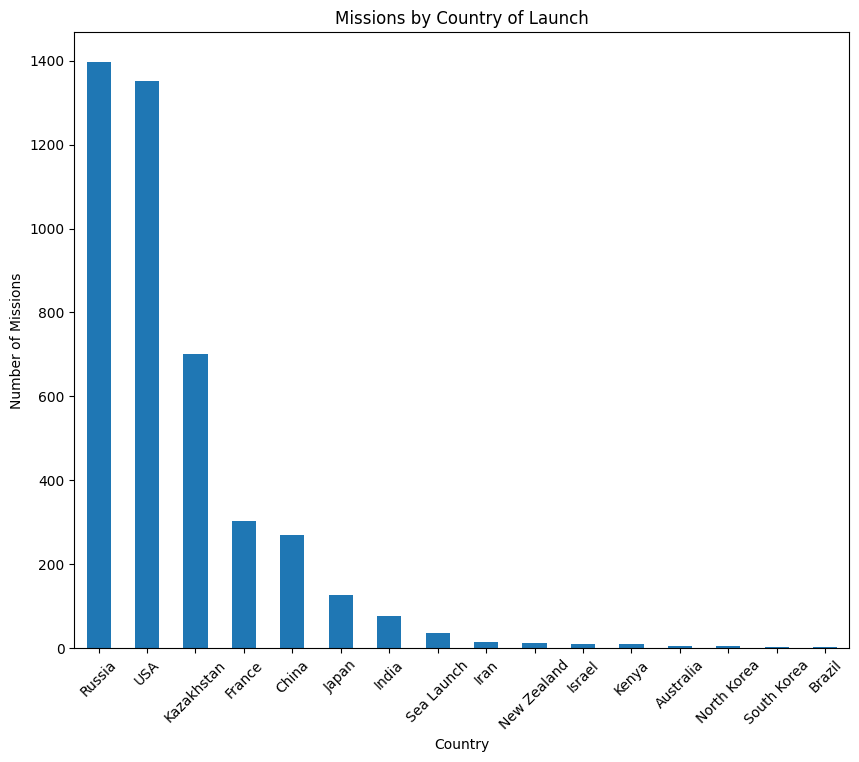

In [7]:
missions_by_country = df['Country of Launch'].value_counts()
plt.figure(figsize=(10, 8))
missions_by_country.plot(kind='bar')
plt.title('Missions by Country of Launch')
plt.xlabel('Country')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.show()

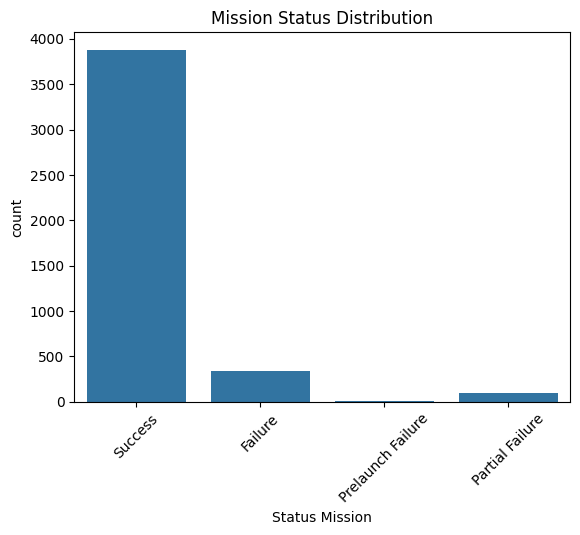

In [8]:
sns.countplot(data=df, x='Status Mission')
plt.title('Mission Status Distribution')
plt.xticks(rotation=45)
plt.show()

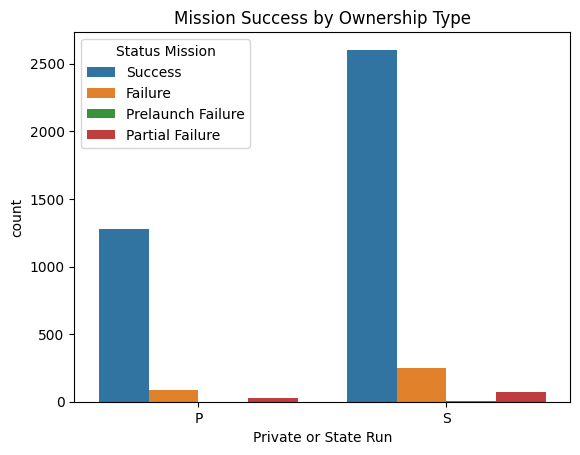

In [9]:
sns.countplot(data=df, x='Private or State Run', hue='Status Mission')
plt.title('Mission Success by Ownership Type')
plt.legend(title='Status Mission')
plt.show()


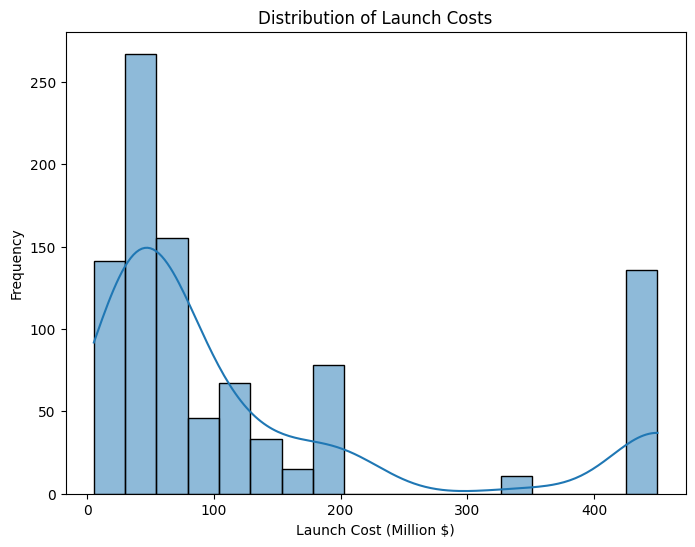

In [10]:
# 5. Distribution of launch costs (if applicable)
# Ensure the 'Rocket' column is cleaned and converted to numeric
df[' Rocket'] = pd.to_numeric(df[' Rocket'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.histplot(df[' Rocket'], kde=True)
plt.xlabel('Launch Cost (Million $)')
plt.ylabel('Frequency')
plt.title('Distribution of Launch Costs')
plt.show()

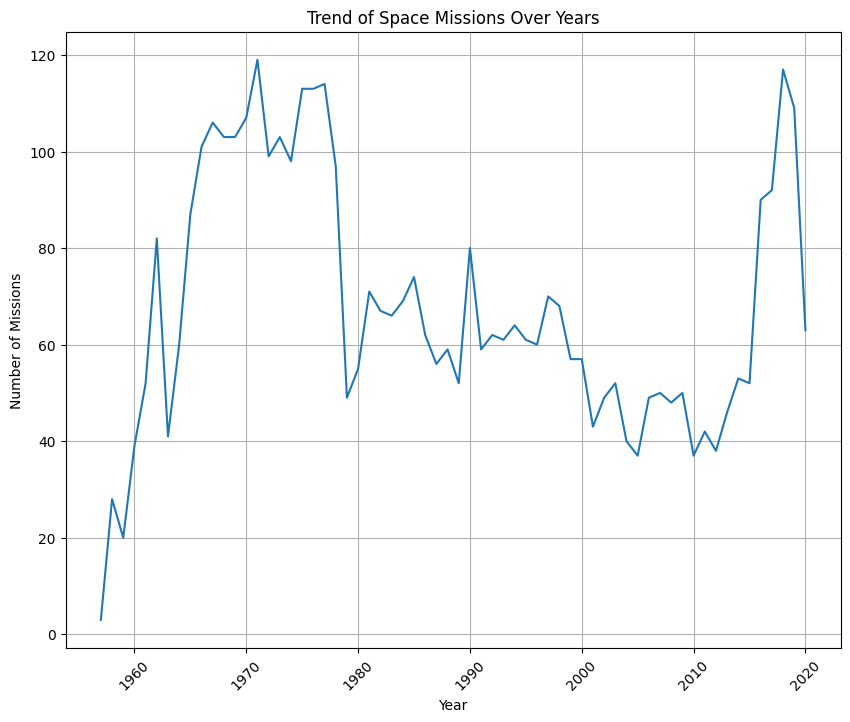

In [11]:
# 6. Trend of space missions over years
# Convert 'Datum' to datetime

# Group by year to count missions per year
missions_per_year = df.groupby('Year').size()

# Plotting the trend of space missions over years
plt.figure(figsize=(10, 8))
missions_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.title('Trend of Space Missions Over Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

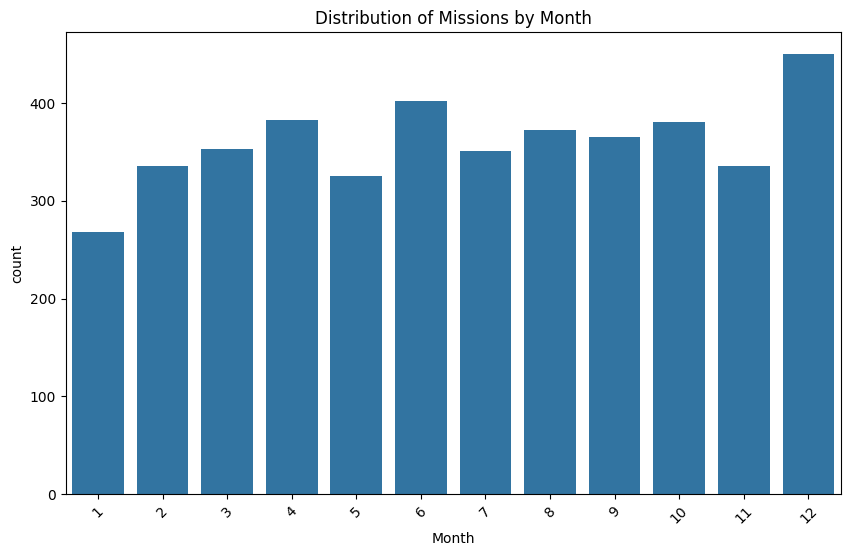

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month')
plt.title('Distribution of Missions by Month')
plt.xticks(rotation=45)
plt.show()

In [20]:
df1 = pd.read_csv("dataset/astronauts.csv")
df1.head()


,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,...,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0


In [21]:
df1 = df1.drop(['nationwide_number','original_name', 'selection', 'year_of_selection', 'mission_number', 
                'occupation', 'total_hrs_sum', 'field21', 'eva_hrs_mission', 'total_eva_hrs'], axis=1)
df1.head()

,id,number,name,sex,year_of_birth,nationality,military_civilian,total_number_of_missions,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission
0,1,1,"Gagarin, Yuri",male,1934,U.S.S.R/Russia,military,1,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77
1,2,2,"Titov, Gherman",male,1935,U.S.S.R/Russia,military,1,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00
2,3,3,"Glenn, John H., Jr.",male,1921,U.S.,military,2,1962,MA-6,MA-6,MA-6,MA-6,5.00
3,4,3,"Glenn, John H., Jr.",male,1921,U.S.,military,2,1998,STS-95,STS-95,STS-95,STS-95,213.00
4,5,4,"Carpenter, M. Scott",male,1925,U.S.,military,1,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00


In [24]:
df1.groupby(['nationality'])
df1.head()

,id,number,name,sex,year_of_birth,nationality,military_civilian,total_number_of_missions,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission
0,1,1,"Gagarin, Yuri",male,1934,U.S.S.R/Russia,military,1,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77
1,2,2,"Titov, Gherman",male,1935,U.S.S.R/Russia,military,1,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00
2,3,3,"Glenn, John H., Jr.",male,1921,U.S.,military,2,1962,MA-6,MA-6,MA-6,MA-6,5.00
3,4,3,"Glenn, John H., Jr.",male,1921,U.S.,military,2,1998,STS-95,STS-95,STS-95,STS-95,213.00
4,5,4,"Carpenter, M. Scott",male,1925,U.S.,military,1,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00


<Axes: ylabel='nationality'>

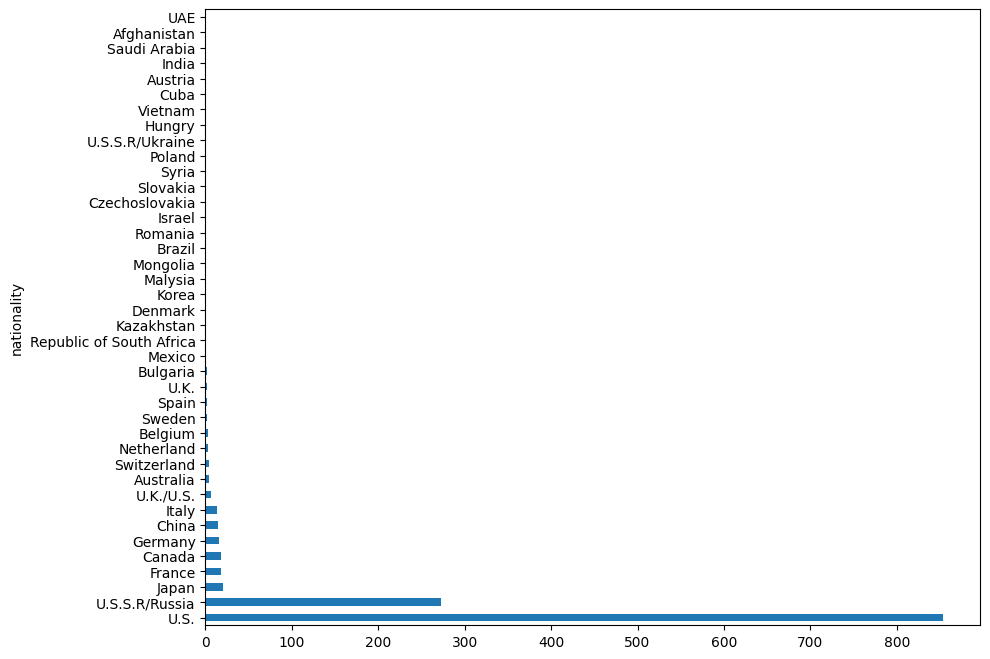

In [28]:
nationality = df1['nationality'].value_counts()
plt.figure(figsize=(10, 8))
nationality.plot(kind='barh')

<Axes: ylabel='military_civilian'>

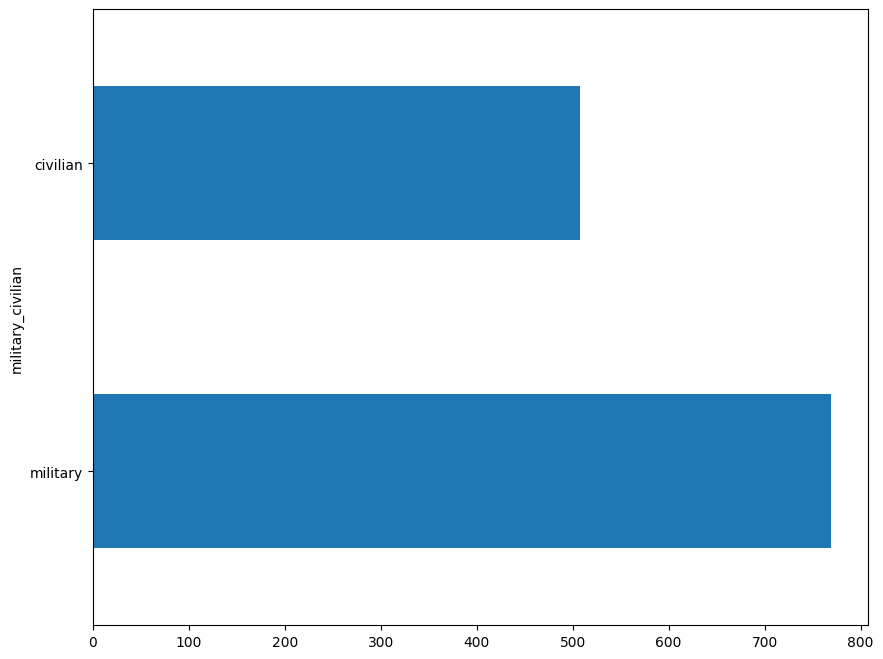

In [30]:
type_of_mission = df1['military_civilian'].value_counts()
plt.figure(figsize=(10, 8))
type_of_mission.plot(kind='barh')